## IMport Libary

In [3]:
import joblib
import pandas as pd
import numpy as np
import sys 
sys.path.append('..')
from src.load import load_data
from src.ploter import Ploter
ploter = Ploter()

## Load Model, X_train and X_test

In [2]:
# Load data
X_train = np.load('../Data/processed/X_fraud_train.npy', allow_pickle=True)
X_test = np.load('../Data/processed/X_fraud_test.npy', allow_pickle=True)
y_test = np.load('../Data/processed/y_fraud_test.npy', allow_pickle=True)
# load Manually create feature names
path = ('../Data/processed/feature_names_fraud.csv')
feature_names_df = load_data(path)
feature_names = feature_names_df.iloc[:, 1].tolist() # Take the second column
# Load trained model
best_rf = joblib.load("../models/fraud_model.joblib")
# Convert NumPy arrays to DataFrames for SHAP
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test  = pd.DataFrame(X_test, columns=feature_names)
# Check
print(X_train.columns[:10])

Index(['purchase_value', 'age', 'hour_of_purchase', 'day_of_purchase',
       'time_since_signup', 'transaction_count', 'browser_FireFox',
       'browser_IE', 'browser_Opera', 'browser_Safari'],
      dtype='object')


## Built-in Feature Importance (Baseline)

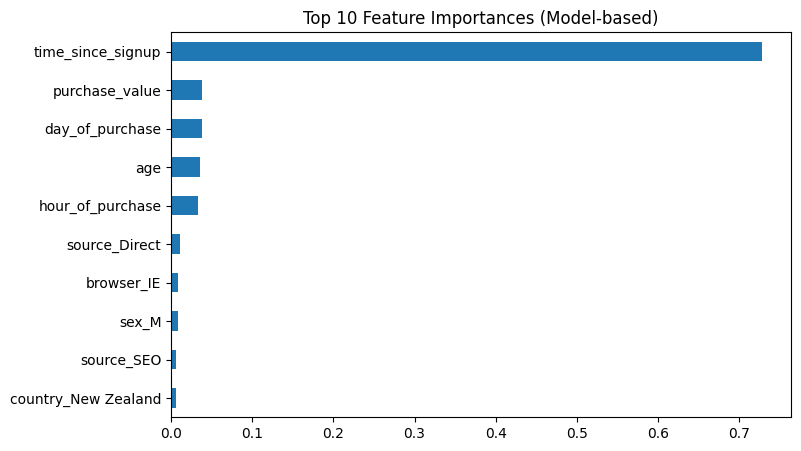

In [4]:
importances = best_rf.feature_importances_

feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
ploter.bar_feature_importance(feature_importances.head(10))